In [188]:
import numpy
import os
import soundfile as sf
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from python_speech_features import mfcc
from python_speech_features.base import delta
import warnings
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
from mlxtend.plotting import plot_decision_regions
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture

In [210]:
def extract_features(audio_data, samplerate):
    mfcc_features = []
    hamming_window = numpy.hamming(400)
    for i in range(0,audio_data.shape[0]-400,240):
        trimmed = audio_data[i:i+400]
        hammed = numpy.multiply(hamming_window, trimmed)
        mfcced = mfcc(hammed,samplerate, nfft = 2048)
        mfcc_features.append(mfcced[0])
    delta_features = delta(mfcc_features, 1)
    return mfcc_features, delta_features

In [163]:
english_mfcc_features = []
english_delta_features = []
english_features = []
num_iterations = 0
for file in os.listdir("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\English_Data\\"):
    audio_data, samplerate = sf.read("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\English_Data\\" + file)
    if (len(audio_data.shape) > 1):
        audio_data = audio_data[:,0]
    print(file, samplerate)
    audio_mfcc, audio_delta = extract_features(audio_data, samplerate)
    english_mfcc_features.extend(audio_mfcc)
    english_delta_features.extend(audio_delta)
    num_iterations+=1
    if (num_iterations == 10):
        break
print("Done")

1272-128104-0000.flac 16000
1272-128104-0001.flac 16000
1272-128104-0002.flac 16000
1272-128104-0003.flac 16000
1272-128104-0004.flac 16000
1272-128104-0005.flac 16000
1272-128104-0006.flac 16000
1272-128104-0007.flac 16000
1272-128104-0008.flac 16000
1272-128104-0009.flac 16000
Done


In [164]:
hindi_mfcc_features = []
hindi_delta_features = []
hindi_features = []
num_iterations = 0
for file in os.listdir("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\Hindi_Data_flac\\"):
    audio_data, samplerate = sf.read("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\Hindi_Data_flac\\" + file)
#     if (file != 'Hin_Sur.flac'):
#         continue
    hamming_window = numpy.hamming(400)
    audio_data = audio_data[:,0]
    print(file, samplerate)

    audio_mfcc, audio_delta = extract_features(audio_data, samplerate)
    hindi_mfcc_features.extend(audio_mfcc)
    hindi_delta_features.extend(audio_delta)
    num_iterations+=1
    if (num_iterations == 4):
        break

00ywwvulzwa.flac 44100
01rjjbm5mtn.flac 44100
05uipha1itb.flac 44100
0ec1nsncnvc.flac 44100


In [167]:
print(len(hindi_mfcc_features), len(hindi_delta_features))
print(len(english_mfcc_features), len(english_delta_features))
if (len(hindi_mfcc_features) != len(hindi_delta_features)):
    print("PROBLEM")

7332 7332
7305 7305


In [170]:
zeros = [0]*len(english_mfcc_features)
english_mfcc_features = numpy.array(english_mfcc_features)
english_delta_features = numpy.array(english_delta_features)
x_English = numpy.concatenate((english_mfcc_features, english_delta_features), axis = 1)

ones = [1]*len(hindi_mfcc_features)
hindi_mfcc_features = numpy.array(hindi_mfcc_features)
hindi_delta_features = numpy.array(hindi_delta_features)
x_Hindi = numpy.concatenate((hindi_mfcc_features, hindi_delta_features),axis = 1)

X = numpy.concatenate((x_English, x_Hindi), axis=0)
Y = numpy.concatenate((zeros, ones), axis=0)
normalized_X = preprocessing.normalize(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(normalized_X, Y, test_size = 0.2)

In [173]:
#SVM
# parameters = [{'kernel': ['rbf'], 'gamma' : [0.001,0.05,0.1,10], 'C' : [0.001, 0.01, 0.1, 1,2.5,100]}]
# clf = GridSearchCV(svm.SVC(), parameters, cv = 5)
# clf = GridSearchCV(svm.SVC())
clf_svm = svm.SVC()
clf_svm.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [174]:
#Logistic Regression
clf_logistic = LogisticRegression(penalty="l2", solver='lbfgs')
clf_logistic.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [175]:
#MLP Classifier
clf_nn = MLPClassifier(hidden_layer_sizes = (100, 50, 20))
clf_nn.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [ ]:
#NN Train - without feature extraction
train_data = []
train_labels = []
for file in os.listdir("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\English_Data_New\\"):
        data, samplerate = sf.read("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\English_Data_New\\" + file)
        if (len(data.shape) > 1):
            data = data[:,0]
        train_data.append(data[0:10000])
        train_labels.append(0)
        
for file in os.listdir("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\Hindi_Data_New\\"):
        data, samplerate = sf.read("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\Hindi_Data_New\\" + file)
        if (len(data.shape) > 1):
            data = data[:,0]
        train_data.append(data[:10000])
        train_labels.append(1)

In [ ]:
#NN Test - without feature extraction
test_data, samplerate = sf.read("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\\Eng_Sur.flac")
test_data = test_data[:,0]
test_data = test_data[:10000]
print(test_data.shape)
test_data = numpy.reshape(test_data, (1, 10000))
pred = clf_nn.predict_proba(test_data)
print(pred)

In [190]:
#GMM
clf_gmm = GaussianMixture()
clf_gmm.fit(x_train, y_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=1, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [177]:
#HMM

In [192]:
print(clf_svm.score(x_test, y_test))
print(clf_logistic.score(x_test, y_test))
print(clf_nn.score(x_test, y_test))
pred = clf.predict(x_test)
print(accuracy_score(pred, y_test))

0.9620901639344263
0.9610655737704918
0.987363387978142
0.9620901639344263


In [198]:
def testing(filename):
    mfcc_features = []
    delta_features = []
    test_English = []
    #data, samplerate = sf.read("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\\Eng_Sur.flac")
    data, samplerate = sf.read(filename)
    print(data.shape)
    print(samplerate)
    data = data[:,0]
    mfcc_features, delta_features = extract_features(data, samplerate)
    test_English = numpy.concatenate((mfcc_features,delta_features),axis = 1)
    test_English = preprocessing.normalize(test_English)
    results = clf.predict(test_English)
    print(results)
    print(sum(results))
    print("English Accuracy:")
    print(1-sum(results)/len(test_English))
    print("Hindi Accuracy:")
    print(sum(results)/len(test_English))

In [196]:
mfcc_features = []
delta_features = []
test_Hindi = []
data, samplerate = sf.read("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\\Hin_Sur.flac")
print(data.shape)
print(samplerate)
data = data[:,0]
mfcc_features, delta_features = extract_features(data, samplerate)
test_Hindi = numpy.concatenate((mfcc_features,delta_features),axis = 1)
test_Hindi = preprocessing.normalize(test_Hindi)
results = clf.predict(test_Hindi)
print(results)
print(sum(results))
print (sum(results)/len(test_Hindi))

(87040, 2)
16000
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
331
0.9168975069252078


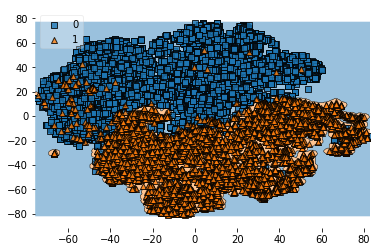

In [197]:
tsne_images = TSNE(n_components=2).fit_transform(normalized_X)
tsne_classifier = svm.SVC()
tsne_classifier.fit(tsne_images, Y)
plot_decision_regions(tsne_images, (numpy.asarray(Y)).astype(int), clf = tsne_classifier, legend = 2)

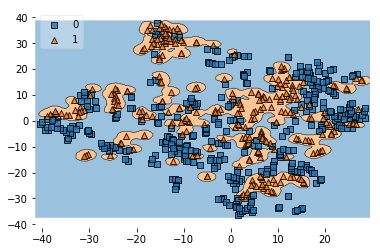

In [208]:
data, samplerate = sf.read("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\\Eng_Sur.flac")
data = data[:,0]
hin_mfcc, hin_delta = extract_features(data, samplerate)
data, samplerate = sf.read("C:\\Users\Lenovo\Desktop\\Utility\Semester 5\Machine Learning\Project\\Hin_Sur.flac")
data = data[:,0]
eng_mfcc, eng_delta = extract_features(data, samplerate)

zeros = [0]*len(eng_mfcc)
eng_mfcc = numpy.array(eng_mfcc)
eng_delta = numpy.array(eng_delta)
x_English = numpy.concatenate((eng_mfcc, eng_delta), axis = 1)
# x_English = eng_delta
ones = [1]*len(hin_mfcc)
hin_mfcc = numpy.array(hin_mfcc)
hin_delta = numpy.array(hin_delta)
x_Hindi = numpy.concatenate((hin_mfcc, hin_delta), axis = 1)
# x_Hindi = hin_delta
X = numpy.concatenate((x_English, x_Hindi), axis=0)
Y = numpy.concatenate((zeros, ones), axis=0)
normalized_X = preprocessing.normalize(X)

tsne_images = TSNE(n_components=2).fit_transform(normalized_X)
tsne_classifier = svm.SVC()
tsne_classifier.fit(tsne_images, Y)
plot_decision_regions(tsne_images, (numpy.asarray(Y)).astype(int), clf = tsne_classifier, legend = 2)